<a href="https://colab.research.google.com/github/Abhijith-Nagarajan/PadhAI_Implementations/blob/main/Sigmoid_Neuron_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Sigmoid Neuron Implementation

#### Sigmoid function:

$S_{w,b}{x} = \frac{1}{1+e^{-(wx+b)}}$

Where w = weight, b = bias, x = input features

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors as clrs
import pandas as pd

In [ ]:
X = [0.5, 0.71]
Y = [0.12, 0.33]

In [ ]:
w = - 0.2
b = 0.4

In [ ]:
def sigmoid(w,b,X):
    return 1.0/(1.0 + np.exp(-(w*X+b)))

In [ ]:
def loss(Y,Y_pred):
    return np.sum((Y-Y_pred)**2)

In [ ]:
Y_pred = [sigmoid(w,b,x) for x in X]

In [ ]:
print(f'Loss: {loss(np.array(Y),np.array(Y_pred))}')

Loss: 0.261341687350902


##### Plotting Sigmoid function for 100 values

In [ ]:
X_array = np.linspace(-10,10,100)

In [ ]:
w_new = 0.31
b_new = 0.1

In [ ]:
Y_array = sigmoid(w_new,b_new,X_array)

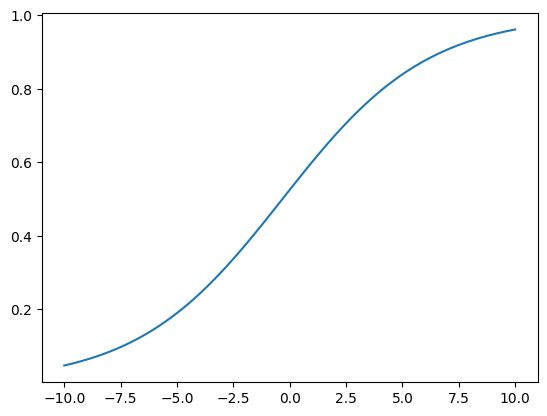

In [ ]:
plt.plot(X_array,Y_array)

#### What is the significance of w and b?

##### CASE 1: On altering the sign for the weight, the direction of the curve is reversed.

In [ ]:
w_new = -0.31
b_new = 0.1

In [ ]:
Y_array = sigmoid(w_new,b_new,X_array)

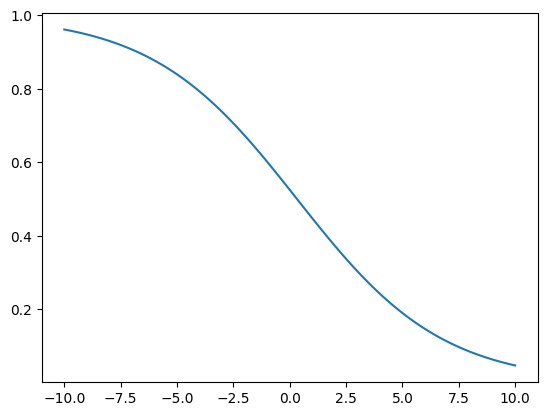

In [ ]:
plt.plot(X_array,Y_array)

##### CASE 2: On increasing the magnitude for the weight, the curve gets less steep

In [ ]:
w_new = 0.62
b_new = 0.1

In [ ]:
Y_array = sigmoid(w_new,b_new,X_array)

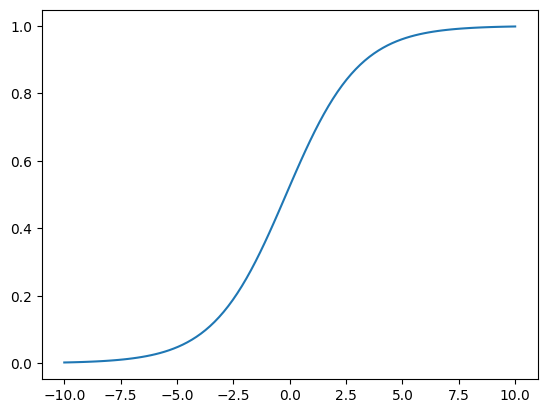

In [ ]:
plt.plot(X_array,Y_array)

##### CASE 3: Change to the bias impacts the steepness of the overall curve. Depending on the combination of the weight and bias, the tail could be extended to the left or the right. Refer to the slider.

In [ ]:
w_new = 0.31
b_new = -0.1

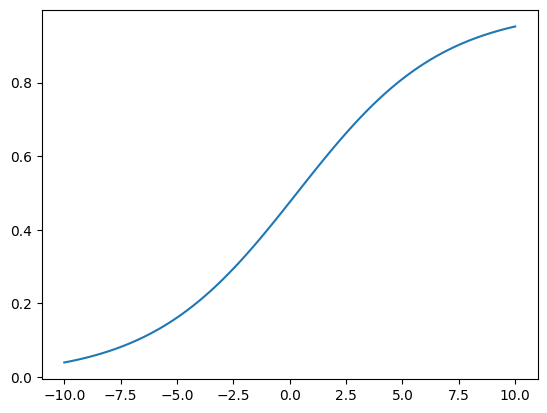

In [ ]:
Y_array = sigmoid(w_new,b_new,X_array)
plt.plot(X_array,Y_array)

##### CASE 4: Change to the bias impacts the steepness of the overall curve. Depending on the combination of the weight and bias, the tail could be extended to the left or the right. Refer to the slider.

In [ ]:
w_new = 0.31
b_new = 0.5

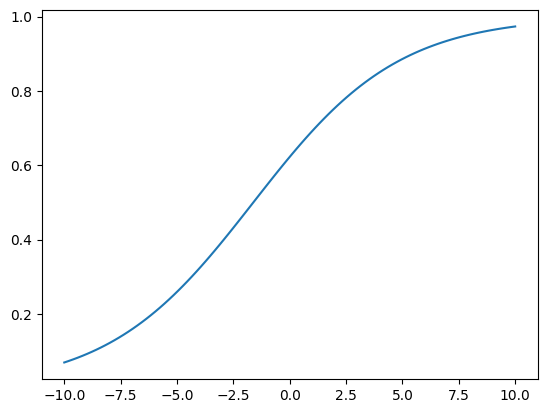

In [ ]:
Y_array = sigmoid(w_new,b_new,X_array)
plt.plot(X_array,Y_array)

#### Adding Viz component to 2D sigmoid plot

In [ ]:
w_slider = 3 #@param {type: "slider", min: -3, max: 3}
b_slider = -11 #@param {type:"slider", min:-100, max:100, step:1}

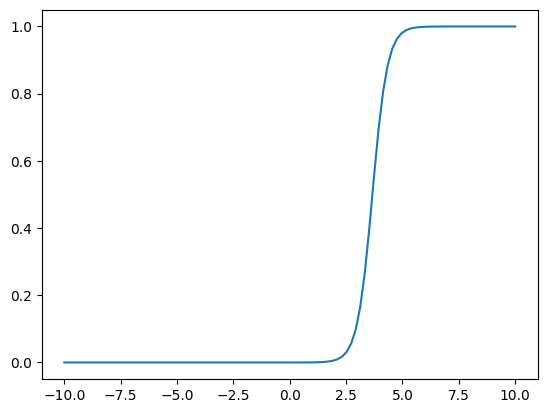

In [ ]:
Y = sigmoid(w_slider,b_slider,X_array)
plt.plot(X_array,Y)

#### 3-D Sigmoid plot

In [ ]:
from mpl_toolkits import mplot3d

In [ ]:
def sigmoid_2D(X1,X2,w1,w2,b):
    return 1.0/(1.0+np.exp(-(w1*X1+w2*X2+b)))

In [ ]:
X1 = np.linspace(-10,10,100)
X2 = np.linspace(-10,10,100)

In [ ]:
w1 = 0.2
w2 = 0.2
b = 0

In [ ]:
X1_mesh, X2_mesh = np.meshgrid(X1,X2)

In [ ]:
Y = sigmoid_2D(X1_mesh,X2_mesh,w1,w2,b)

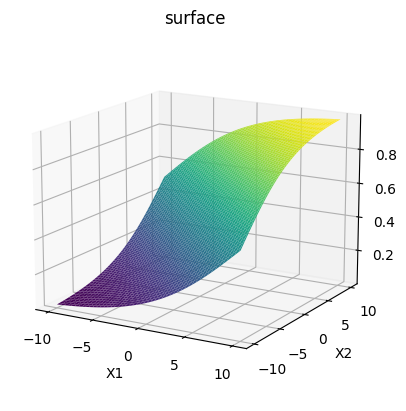

In [ ]:
ax = plt.axes(projection='3d')
ax.plot_surface(X1_mesh, X2_mesh, Y, cmap='viridis')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
ax.set_title('surface')

# Parameter 1: Height, Parameter 2: Rotation Angle along z axis
ax.view_init(15,300)

##### An alternate means to visualize the findings is through a contour plot. This graph takes the two mesh features as input and represents Y as a color.

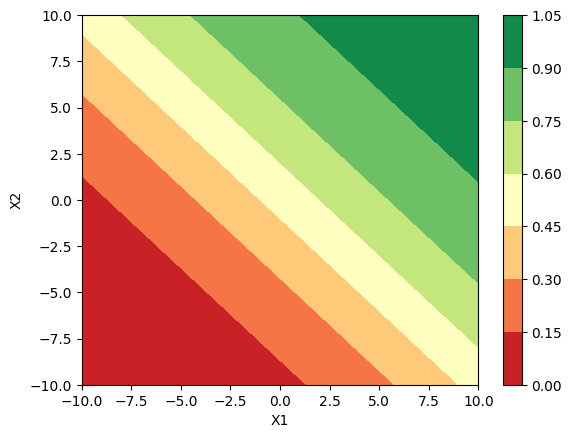

In [ ]:
contour_plot = plt.contourf(X1_mesh,X2_mesh,Y,cmap='RdYlGn')
plt.colorbar(contour_plot)
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()

###### From the above plot, it can be observed that when X1 = 10 and X2 = 10, Y=1.

#### Compute loss using sigmoid ####

Objective: Given X and Y, find the most optimal w and b

In [ ]:
X = np.linspace(-25,25,100)
Y = np.linspace(0,1,100)

In [ ]:
W = np.linspace(-1,1,50)
B = np.linspace(0,1,50)

In [ ]:
WW_Mesh, BB_Mesh = np.meshgrid(W,B)

In [ ]:
Loss = np.zeros(WW_Mesh.shape)

In [ ]:
def compute_loss(X,Y,w_est,b_est):
    loss = 0
    for x,y in zip(X,Y):
        Y_pred = sigmoid(w_est,b_est,x)
        loss+= (y-Y_pred)**2

    print(f'Returning: {loss} for w: {w_est}, b: {b_est}')
    return loss

In [ ]:
for i in range(WW_Mesh.shape[0]):
    for j in range(BB_Mesh.shape[1]):
        Loss[i,j] = compute_loss(X,Y,WW_Mesh[i,j],BB_Mesh[i,j])

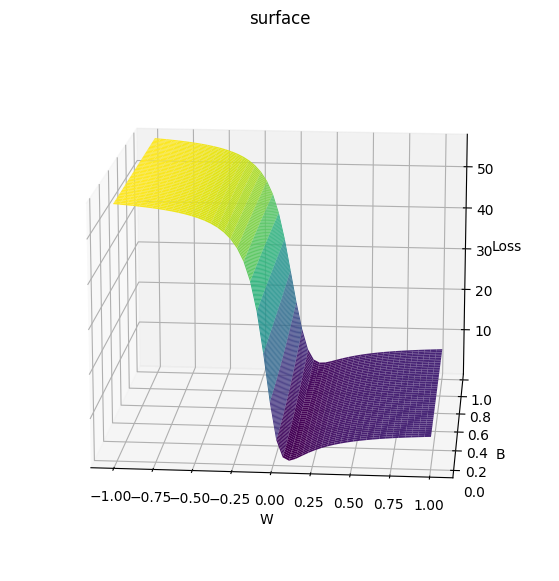

In [ ]:
plt.figure(figsize=(15,7))
ax = plt.axes(projection='3d')
ax.plot_surface(WW_Mesh, BB_Mesh, Loss, cmap='viridis')
ax.set_xlabel('W')
ax.set_ylabel('B')
ax.set_zlabel('Loss')
ax.set_title('surface')
# Parameter 1: Height, Parameter 2: Rotation Angle along z axis
ax.view_init(15,275)

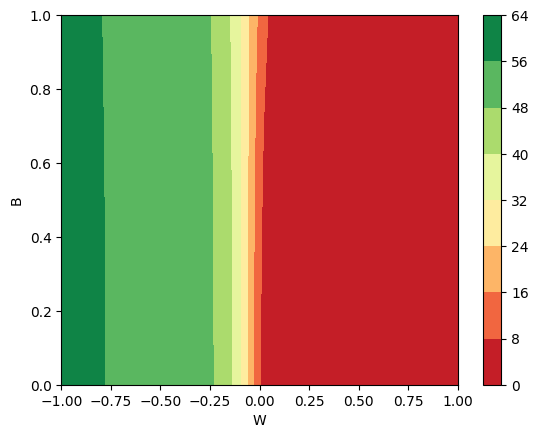

In [ ]:
wbl_cf_plot = plt.contourf(WW_Mesh,BB_Mesh,Loss,cmap='RdYlGn')
plt.colorbar(wbl_cf_plot)
plt.xlabel('W')
plt.ylabel('B')
plt.show()

###### Overall, with the representation of the 3D loss function, it is possible to interpret how the loss reduces for multiple values.Now we can compute the optimal values for w and b such that the loss is the least.

In [ ]:
ij = np.argmin(Loss)

In [ ]:
i = int(np.floor(ij/WW_Mesh.shape[1]))
j = int(ij - i*WW_Mesh.shape[1])

In [ ]:
WW_Mesh[i,j]

0.1020408163265305

In [ ]:
BB_Mesh[i,j]

0.0

#### Sigmoid Neuron class

In [ ]:
class Sigmoid_Neuron:
    def __init__(self,X):
        self.w = np.random.rand(X.shape[1])
        self.b = np.random.rand()
        self.model_loss_training = dict()

    def compute_loss(self,Y : np.array,Y_pred : np.array,is_training : bool):
        return (Y-Y_pred)**2  if is_training else np.sum((Y-Y_pred)**2)

    def sigmoid_function(self,X):
        return 1.0/(1.0+np.exp(-(np.dot(self.w,X) + self.b)))

    def grad_w(self,X,Y,Y_pred):
        return (Y_pred - Y)*(Y_pred*X*(1-Y_pred))

    def grad_b(self,Y,Y_pred):
        return (Y_pred - Y)*(Y_pred*(1-Y_pred))

    def fit(self,X,Y,epochs,lr):
        dw, db = 0, 0
        for epoch in range(epochs):
            loss = 0
            for x,y in zip(X,Y):
                y_pred = self.sigmoid_function(x)
                dw += self.grad_w(x,y,y_pred)
                db += self.grad_b(y,y_pred)
                loss+= self.compute_loss(y,y_pred,True)

            self.w -= lr*dw
            self.b -= lr*db
            self.model_loss_training[epoch+1] = loss

    def predict(self,X):
        Y_pred_test = np.array(self.sigmoid_function(X))
        return Y_pred_test


In [ ]:
X = np.array([[1,2,3,4,5],[-1,-2,-3,-4,-5],[0,0.2,0.4,0.6,1],[1,3,5,7,9],[2,3,4,5,6]])
Y = np.array([0.2,0.4,0.65,0.81,0.99])

In [ ]:
sg_neuron = Sigmoid_Neuron(X)

In [ ]:
sg_neuron.fit(X,Y,10,0.45)

In [ ]:
X_test = np.array([[1,2,3,4,5],[-1,-2,-3,-4,-5],[0,0.2,0.4,0.6,1],[1,3,5,7,9],[2,3,4,5,6]])
Y_test = np.array([0.2,0.4,0.65,0.81,0.99])

In [ ]:
Y_pred_test = sg_neuron.predict(X_test)

In [ ]:
sg_neuron.compute_loss(Y_test,Y_pred_test,False)

0.737488207102569

###### Dummy testing

In [ ]:
def sigmoid_test(w,b,X):
    return 1.0/(1.0 + np.exp(-(np.dot(w,X)+b)))

In [ ]:
w = np.array([1,1,1,1,1])
b = 0.2

In [ ]:
test_df = {'c1':np.array([1,2,3,4,5]),'c2':np.array([-1,-2,-3,-4,-5]),'c3':np.array([0,0.2,0.4,0.6,1]),'c4':np.array([1,3,5,7,9]),'c5':([2,3,4,5,6])}
w = np.array([1,1,1,1,1])
b = 0.2

In [ ]:
print(sigmoid_test(w,b,X))

[0.96083428 0.9983412  0.99993228 0.99999724 0.99999991]


In [ ]:
for x in X:
    print(np.dot(x,w) + b)
    #print(sigmoid_test(w,b,x))

15.2
-14.8
2.4000000000000004
25.2
20.2
